In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

from keras.preprocessing.image import ImageDataGenerator

from keras.models import load_model
import pickle
from sklearn.metrics import classification_report

In [4]:
custom_early_stopping = EarlyStopping(monitor='val_accuracy', patience=5) 
callbacks=[custom_early_stopping]

In [5]:
train_dir = 'Data/train_images_with_noise'

test_dir = 'Data/test_images'

In [6]:
train_data_gen_1 = ImageDataGenerator(rescale = 1./255, validation_split = .2)

train_generator_1 = train_data_gen_1.flow_from_directory(

                                                    train_dir, 
                                                    target_size = (160, 120),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training')

validation_generator_1 = train_data_gen_1.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (160, 120),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation')

test_data_gen_1 = ImageDataGenerator(rescale=1./255)

test_generator_1 = test_data_gen_1.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (160, 120),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 11876 images belonging to 10 classes.
Found 2968 images belonging to 10 classes.
Found 1310 images belonging to 10 classes.


In [40]:
model1 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(160, 120, 3), kernel_regularizer = l2(5e-4) ))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))
model1.add(Dropout(0.2))

# transition to dense fully-connected part of network
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))

model1.add(BatchNormalization())
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.6))

model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_1 = model1.fit(train_generator_1, validation_data = validation_generator_1, 
                           epochs = 45, callbacks=[custom_early_stopping])

Epoch 1/45
372/372 [==============================] - 106s 284ms/step - loss: 2.2092 - accuracy: 0.2301 - val_loss: 2.0417 - val_accuracy: 0.3484
Epoch 2/45
372/372 [==============================] - 108s 291ms/step - loss: 1.9025 - accuracy: 0.3353 - val_loss: 1.7933 - val_accuracy: 0.4067
Epoch 3/45
372/372 [==============================] - 99s 265ms/step - loss: 1.7165 - accuracy: 0.4055 - val_loss: 1.6087 - val_accuracy: 0.4768
Epoch 4/45
372/372 [==============================] - 99s 267ms/step - loss: 1.4949 - accuracy: 0.4944 - val_loss: 1.8491 - val_accuracy: 0.4296
Epoch 5/45
372/372 [==============================] - 99s 265ms/step - loss: 1.7378 - accuracy: 0.4045 - val_loss: 1.5983 - val_accuracy: 0.5323
Epoch 6/45
372/372 [==============================] - 100s 268ms/step - loss: 1.5307 - accuracy: 0.4882 - val_loss: 1.7240 - val_accuracy: 0.4444
Epoch 7/45
372/372 [==============================] - 99s 267ms/step - loss: 1.3963 - accuracy: 0.5347 - val_loss: 1.5422 - val

In [ ]:
model3 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(160, 120, 3), kernel_regularizer = l2(5e-4) ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model3.add(Dropout(0.2))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))

model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.65))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_3 = model3.fit(train_generator_1, validation_data = validation_generator_1, 
                           epochs = 45, callbacks=[custom_early_stopping])

In [ ]:
model1 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model1.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(160, 120, 3), kernel_regularizer = l2(5e-4) ))
model2.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))
model1.add(Dropout(0.2))
model1.add(MaxPooling2D((2, 2)))

# transition to dense fully-connected part of network
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))

model1.add(BatchNormalization())
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.6))

model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_1 = model1.fit(train_generator_1, validation_data = validation_generator_1, 
                           epochs = 45, callbacks=[custom_early_stopping])

In [77]:
model5 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(160, 120, 3), kernel_regularizer = l2(7e-4) ))
# max pool in 2x2 window
model5.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.1))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model5.add(Dropout(0.25))

# transition to dense fully-connected part of network
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))

model5.add(BatchNormalization())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.7))

model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [78]:
history_cnn_5 = model5.fit(train_generator_1, validation_data = validation_generator_1, 
                           epochs = 45, callbacks=[custom_early_stopping])

Epoch 1/45
372/372 [==============================] - 78s 208ms/step - loss: 2.5017 - accuracy: 0.1767 - val_loss: 2.1627 - val_accuracy: 0.2645
Epoch 2/45
372/372 [==============================] - 77s 207ms/step - loss: 2.1660 - accuracy: 0.2317 - val_loss: 2.1154 - val_accuracy: 0.2625
Epoch 3/45
372/372 [==============================] - 78s 209ms/step - loss: 2.0690 - accuracy: 0.2637 - val_loss: 2.1445 - val_accuracy: 0.2911
Epoch 4/45
372/372 [==============================] - 80s 216ms/step - loss: 1.9802 - accuracy: 0.2947 - val_loss: 2.1470 - val_accuracy: 0.2935
Epoch 5/45
372/372 [==============================] - 78s 209ms/step - loss: 1.8839 - accuracy: 0.3346 - val_loss: 1.8415 - val_accuracy: 0.3902
Epoch 6/45
372/372 [==============================] - 74s 198ms/step - loss: 1.7642 - accuracy: 0.3749 - val_loss: 2.7626 - val_accuracy: 0.2658
Epoch 7/45
372/372 [==============================] - 75s 200ms/step - loss: 1.6421 - accuracy: 0.4176 - val_loss: 1.6812 - val_ac

In [79]:
model6 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model6.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(160, 120, 3), kernel_regularizer = l2(5e-4) ))
# max pool in 2x2 window
model6.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.1))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(Dropout(0.25))

# transition to dense fully-connected part of network
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.4))

model6.add(BatchNormalization())
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [80]:
history_cnn_6 = model6.fit(train_generator_1, validation_data = validation_generator_1, 
                           epochs = 45, callbacks=[custom_early_stopping])

Epoch 1/45
372/372 [==============================] - 78s 208ms/step - loss: 2.2809 - accuracy: 0.2267 - val_loss: 2.1339 - val_accuracy: 0.2834
Epoch 2/45
372/372 [==============================] - 80s 215ms/step - loss: 1.8829 - accuracy: 0.3492 - val_loss: 1.8059 - val_accuracy: 0.3898
Epoch 3/45
372/372 [==============================] - 76s 204ms/step - loss: 1.5932 - accuracy: 0.4683 - val_loss: 1.5932 - val_accuracy: 0.4535
Epoch 4/45
372/372 [==============================] - 77s 206ms/step - loss: 1.3921 - accuracy: 0.5435 - val_loss: 1.4673 - val_accuracy: 0.5111
Epoch 5/45
372/372 [==============================] - 77s 206ms/step - loss: 1.2576 - accuracy: 0.5931 - val_loss: 1.5783 - val_accuracy: 0.4565
Epoch 6/45
372/372 [==============================] - 77s 206ms/step - loss: 1.1258 - accuracy: 0.6507 - val_loss: 1.3359 - val_accuracy: 0.5792
Epoch 7/45
372/372 [==============================] - 77s 207ms/step - loss: 1.0429 - accuracy: 0.6818 - val_loss: 1.2696 - val_ac

In [101]:
model6.save('CNN_Models/cnn_model_6.h5')

train_cnn_history = pd.DataFrame(history_cnn_6.history)

train_cnn_history.to_pickle("CNN_Models/train_cnn_history_6.pkl")  

/Users/eitan/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
model6 = load_model('CNN_Models/cnn_model_6.h5')


In [8]:
file = open("CNN_Models/train_cnn_history_6.pkl",'rb')
history_cnn_6 = pickle.load(file)
file.close()


In [9]:
_, test_acc = model6.evaluate(test_generator_1)

41/41 [==============================] - 6s 130ms/step - loss: 0.7443 - accuracy: 0.8053


In [10]:
history_cnn_6

,loss,accuracy,val_loss,val_accuracy
0,2.280882,0.226676,2.133872,0.283356
1,1.882894,0.349192,1.805871,0.389825
2,1.593153,0.468340,1.593216,0.453504
3,1.392119,0.543533,1.467337,0.511119
4,1.257608,0.593129,1.578289,0.456536
5,1.125820,0.650724,1.335866,0.579178
6,1.042852,0.681795,1.269582,0.609838
7,0.976889,0.711182,1.320666,0.624663
8,0.908128,0.738717,1.316108,0.629380
9,0.863354,0.755810,1.243362,0.666779


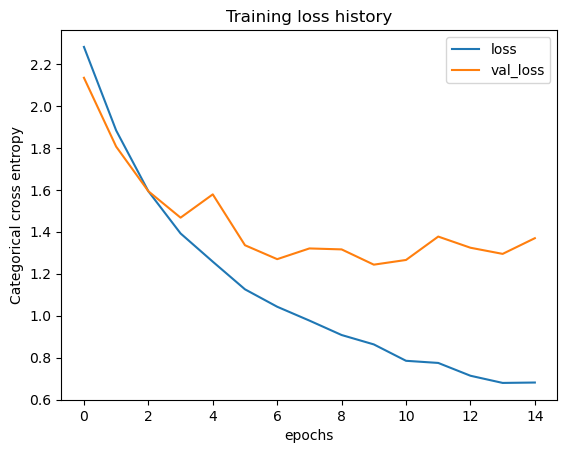

In [11]:
#train_cnn_history = pd.DataFrame(history_cnn_6.history)
train_cnn_history = history_cnn_6
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

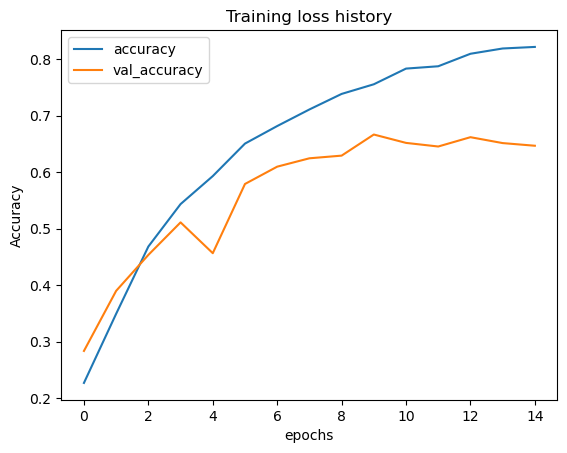

In [12]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [13]:
predictions = model6.predict(test_generator_1)

41/41 [==============================] - 5s 126ms/step


In [21]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jackhammer', 'siren', 'street_music']

In [22]:
# Predict probabilities for test set
predict_prob = model6.predict(test_generator_1, verbose=0)

In [23]:
model6.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 79, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 38, 28, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 36, 26, 64)        36928     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 18, 13, 64)      

In [24]:
predict_results = np.argmax(predict_prob, axis=1)

In [25]:
true_labels = test_generator_1.classes

In [26]:
print(classification_report(true_labels, predict_results, target_names=class_labels))

                  precision    recall  f1-score   support

 air_conditioner       0.80      0.75      0.78       150
        car_horn       0.94      0.78      0.85        64
children_playing       0.71      0.77      0.74       150
        dog_bark       0.85      0.83      0.84       150
        drilling       0.81      0.72      0.76       150
   engine_idling       0.77      0.89      0.83       150
        gun_shot       0.96      0.98      0.97        56
      jackhammer       0.71      0.83      0.77       150
           siren       0.93      0.80      0.86       140
    street_music       0.80      0.79      0.80       150

        accuracy                           0.81      1310
       macro avg       0.83      0.82      0.82      1310
    weighted avg       0.81      0.81      0.81      1310



In [27]:
class_labels

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [28]:
results_report['air_conditioner']['precision']

NameError: name 'results_report' is not defined

In [ ]:
results_report

In [ ]:
df = pd.DataFrame()

In [ ]:
x = np.empty((len(class_labels), 2))

In [ ]:
x

In [ ]:
for idx, label in enumerate(class_labels):
    
    x[idx] =( label, results_report[label]['precision'])

In [ ]:
x

In [ ]:
x = {}
for label in (class_labels):
    
    x[label] = results_report[label]['precision']

In [ ]:
x

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
plt.bar(*zip(*x.items()))
plt.show()


In [ ]:
dict(sorted(x.items(), key=lambda item: item[1]), reverse=True)


In [ ]:
sorted(x, key=x.get, reverse=True)

In [ ]:
sorted_dict = {item: x[item] for item in sorted(x, key=x.get, reverse=True)}

In [ ]:
sorted_dict

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(*zip(*sorted_dict.items()))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('Precision for Each Class', fontsize = 22)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Precision %', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
results_df = pd.DataFrame.from_dict(sorted_dict, orient= 'index')

In [ ]:
results_df.rename(columns = {0: 'Precision'}, inplace = True)

In [ ]:
sorted_dict['gun_shot']

In [ ]:
results_df = pd.DataFrame.from_dict(sorted_dict, orient= 'index')

In [ ]:
sorted_dict(keys)

In [ ]:
results_df['Class'] = results_df.index

In [ ]:
results_df.index

In [ ]:
results_df

In [ ]:
results_df.index

In [ ]:
results_df.columns

In [ ]:
sns.barplot(results_df)
plt.show();

In [ ]:
sorted_dict

In [ ]:
keys = list(sorted_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [int(sorted_dict[k]) for k in keys]
sns.barplot(x=keys, y=vals)
plt.show()

In [29]:
(classification_report(true_labels, predict_results, target_names=class_labels, output_dict= True))

{'air_conditioner': {'precision': 0.8014184397163121,
  'recall': 0.7533333333333333,
  'f1-score': 0.7766323024054984,
  'support': 150},
 'car_horn': {'precision': 0.9433962264150944,
  'recall': 0.78125,
  'f1-score': 0.8547008547008547,
  'support': 64},
 'children_playing': {'precision': 0.7073170731707317,
  'recall': 0.7733333333333333,
  'f1-score': 0.7388535031847134,
  'support': 150},
 'dog_bark': {'precision': 0.8493150684931506,
  'recall': 0.8266666666666667,
  'f1-score': 0.8378378378378378,
  'support': 150},
 'drilling': {'precision': 0.8120300751879699,
  'recall': 0.72,
  'f1-score': 0.7632508833922261,
  'support': 150},
 'engine_idling': {'precision': 0.7732558139534884,
  'recall': 0.8866666666666667,
  'f1-score': 0.8260869565217391,
  'support': 150},
 'gun_shot': {'precision': 0.9649122807017544,
  'recall': 0.9821428571428571,
  'f1-score': 0.9734513274336283,
  'support': 56},
 'jackhammer': {'precision': 0.7102272727272727,
  'recall': 0.8333333333333334,
  

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(true_labels, predict_results)


array([[[1132,   28],
        [  37,  113]],

       [[1243,    3],
        [  14,   50]],

       [[1112,   48],
        [  34,  116]],

       [[1138,   22],
        [  26,  124]],

       [[1135,   25],
        [  42,  108]],

       [[1121,   39],
        [  17,  133]],

       [[1252,    2],
        [   1,   55]],

       [[1109,   51],
        [  25,  125]],

       [[1162,    8],
        [  28,  112]],

       [[1131,   29],
        [  31,  119]]])

In [31]:
true_labels = test_generator_1.classes

In [32]:
true_labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [33]:
true_labels = test_generator_1.classes

In [34]:
predicted_labels = [np.argmax(pred) for pred in predictions]

In [35]:
accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8053435114503816


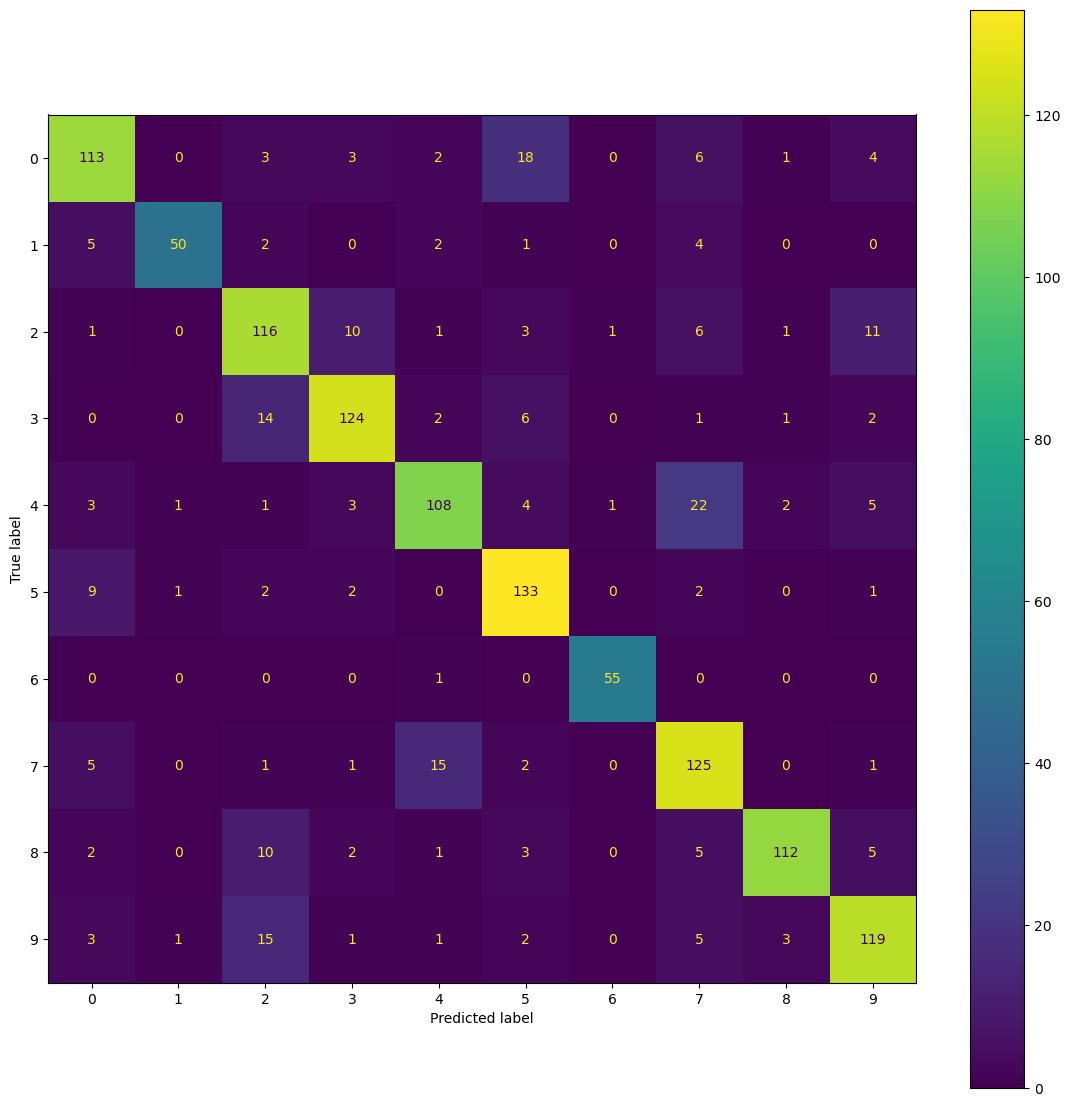

In [36]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);

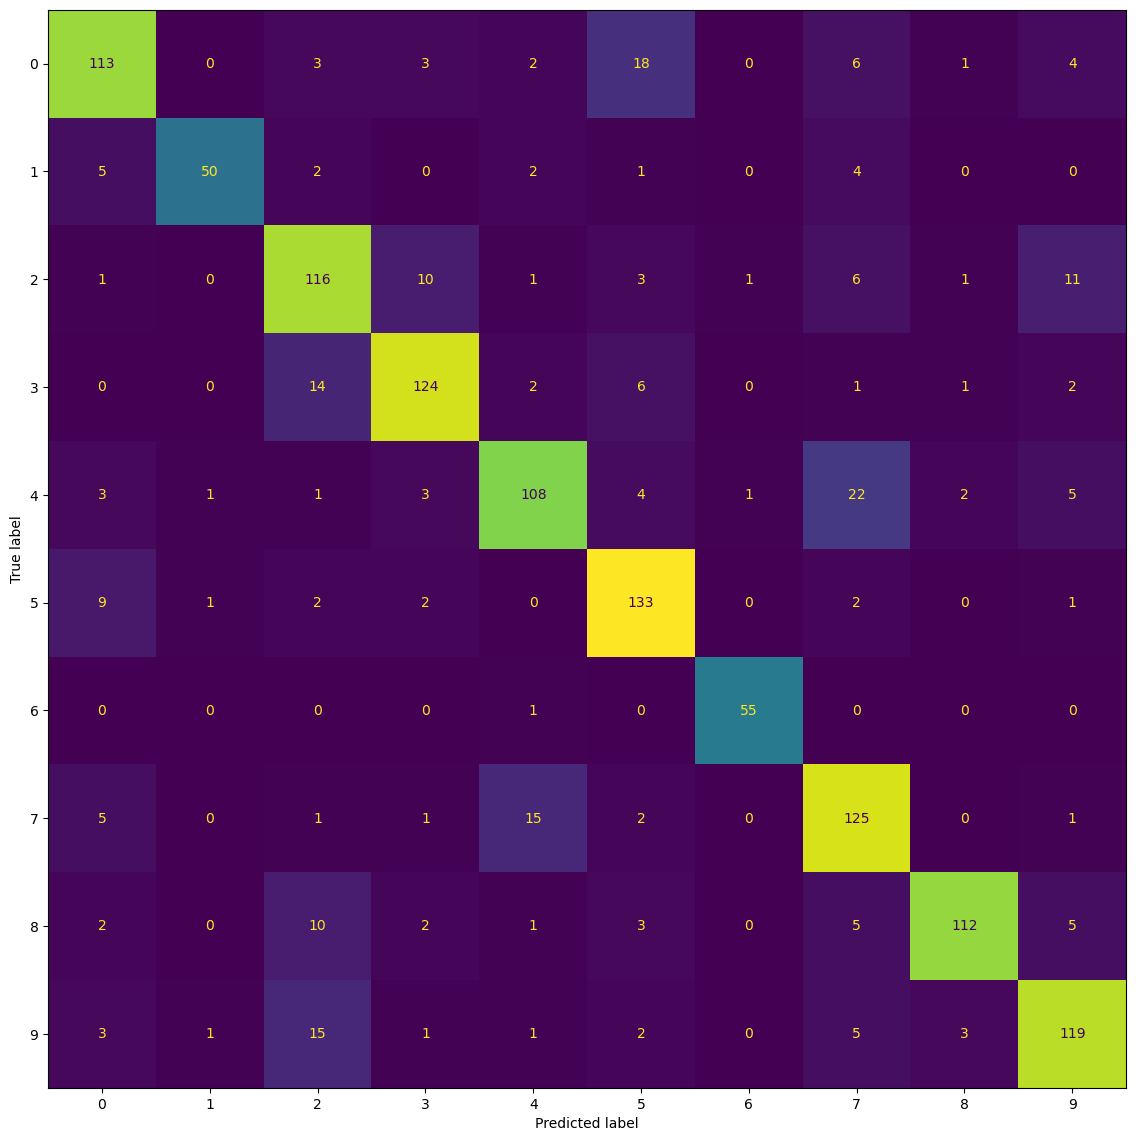

In [37]:

fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax, colorbar=False);

In [38]:
y_true_labeled = []
y_pred_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])

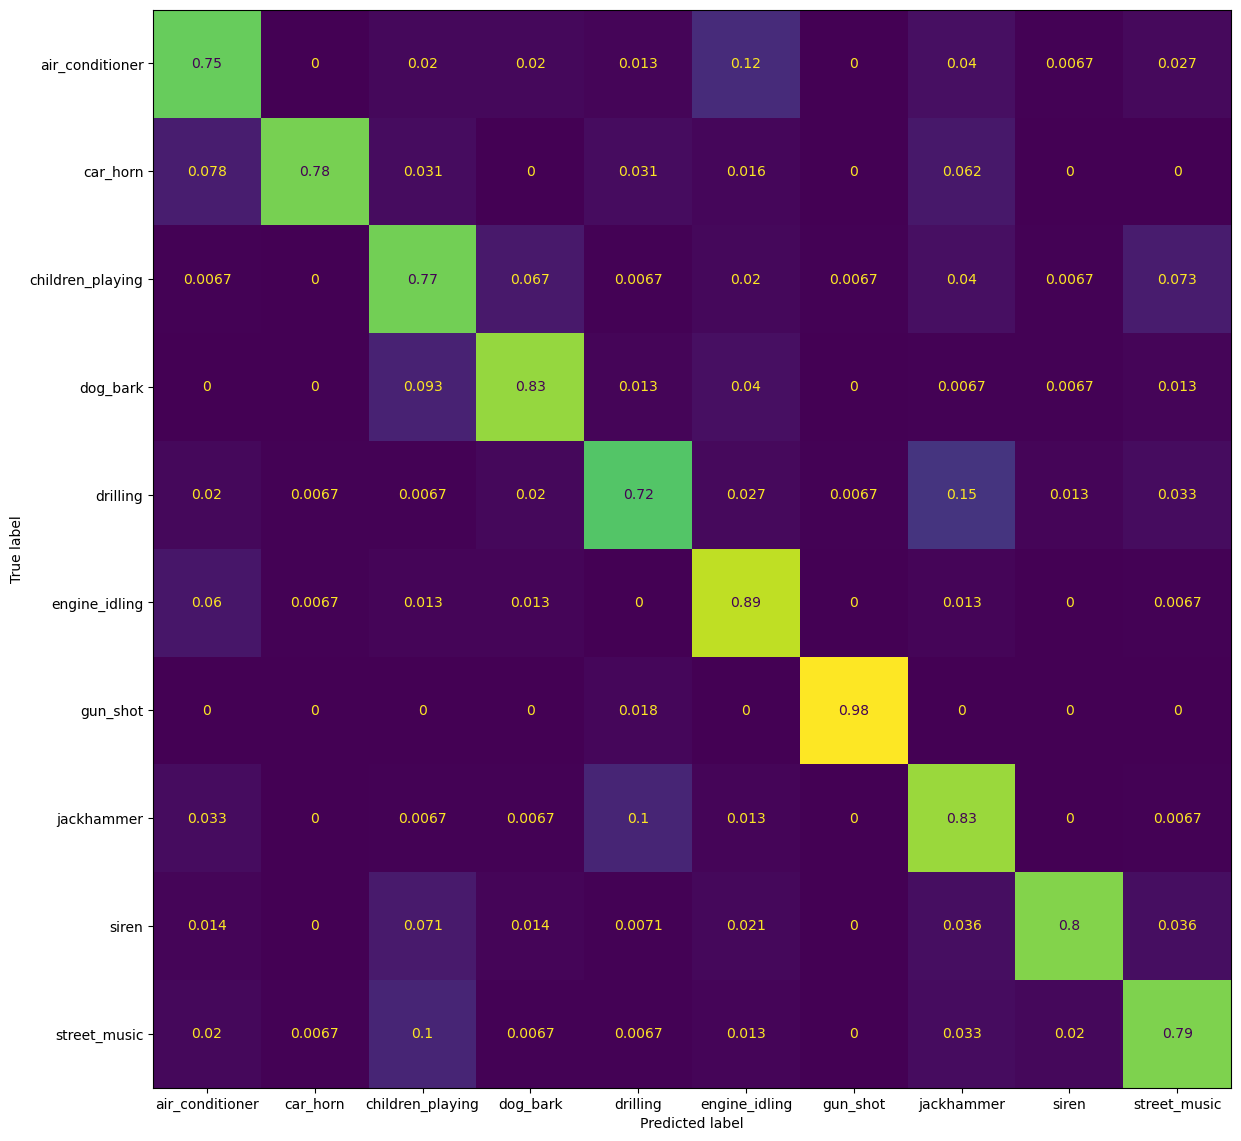

In [47]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax, values_format = '.02g');